In [1]:
import numpy as np
from codes.mc_ic import MC_IC
import pickle as pkl

In [2]:
import torch as T
import torch.nn.functional as F
import torch.optim as optim
from codes.dmp_ic import DMP_IC

# PLT

In [3]:
with open("./results/lr_sigma_max.pkl", "rb") as f:
    lr_sigma_max = pkl.load(f)

In [4]:
with open("./results/wd_log.pkl", "rb") as f:
    wd_log = pkl.load(f)

In [5]:
with open("./results/hept_imm.pkl", "rb") as f:
    imm_log = pkl.load(f)

In [6]:
with open("./results/lr_hept_overlip_1_max.pkl", "rb") as f:
    overlip_1_max = pkl.load(f)

In [7]:
with open("./results/lr_hept_overlip_0.5_max.pkl", "rb") as f:
    overlip_0_5_max = pkl.load(f)

In [8]:
with open("./results/lr_hept_overlip2_1_max.pkl", "rb") as f:
    overlip2_1_max = pkl.load(f)

In [9]:
with open("./results/lr_hept_overlip2_0.5_max.pkl", "rb") as f:
    overlip2_0_5_max = pkl.load(f)

In [10]:
with open("./results/lr_hept_overlip2_0.8_max.pkl", "rb") as f:
    overlip2_0_8_max = pkl.load(f)

In [11]:
with open("./results/lr_hept_overlip2_0.3_max.pkl", "rb") as f:
    overlip2_0_3_max = pkl.load(f)

In [12]:
import matplotlib.pyplot as plt

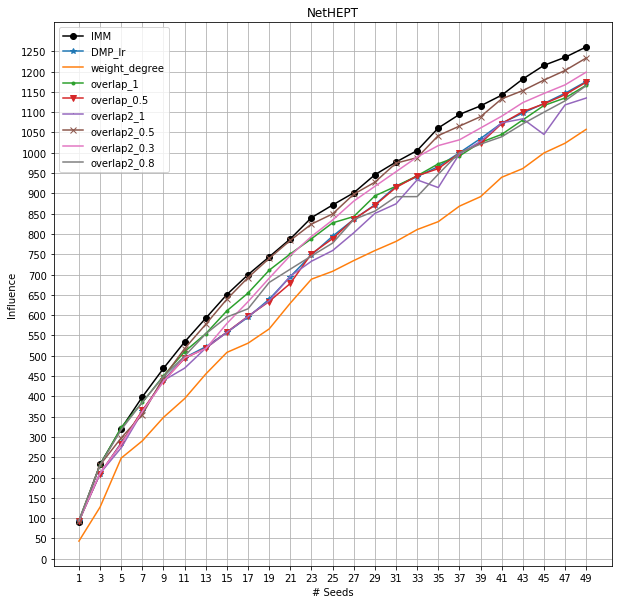

In [13]:
x = range(1, 51, 2)
plt.figure(figsize=(10, 10))
plt.plot(x, imm_log, marker="o", c="k")
plt.plot(x, lr_sigma_max, marker="*")
plt.plot(x, [y[1] for y in wd_log])
plt.plot(x, overlip_1_max, marker=".")
plt.plot(x, overlip_0_5_max, marker="v")
plt.plot(x, overlip2_1_max, marker=",")
plt.plot(x, overlip2_0_5_max, marker="x")
plt.plot(x, overlip2_0_3_max)
plt.plot(x, overlip2_0_8_max)

plt.xticks(x)
plt.yticks(range(0, 1300, 50))
plt.legend(["IMM", "DMP_lr", 
            "weight_degree", "overlap_1", 
            "overlap_0.5", "overlap2_1",
           "overlap2_0.5",
           "overlap2_0.3",
           "overlap2_0.8",])
plt.xlabel("# Seeds")
plt.ylabel("Influence")

plt.title("NetHEPT")
plt.grid(True)
plt.savefig("NetHEPT.pdf")
plt.show()

# Combine Overlap

## dmp threshold = 0.01

In [16]:
with open("./results/hept_imm.pkl", "rb") as f:
    imm_log = pkl.load(f)

In [27]:
with open("./results/NetHEPT_overlap_Lr_1E-4_dmp_10_max.pkl", "rb") as f:
    NetHEPT_overlap_Lr_1E_4_dmp_10_max = pkl.load(f)

In [28]:
with open("./results/NetHEPT_overlap_Lr_1E-4_max.pkl", "rb") as f:
    NetHEPT_overlap_Lr_1E_4_max = pkl.load(f)

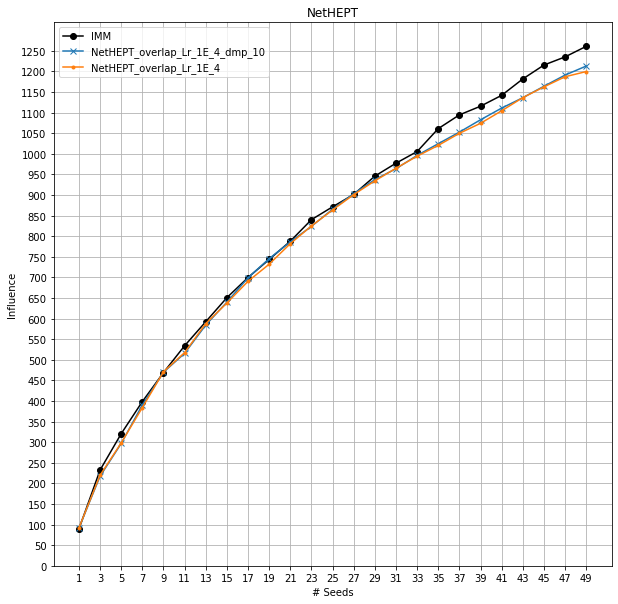

In [42]:
x = range(1, 51, 2)
plt.figure(figsize=(10, 10))
plt.plot(x, imm_log, marker="o", c="k")
plt.plot(x, list(NetHEPT_overlap_Lr_1E_4_dmp_10_max.values()), marker="x")
plt.plot(x, list(NetHEPT_overlap_Lr_1E_4_max.values()), marker=".")


plt.xticks(x)
plt.yticks(range(0, 1300, 50))
plt.legend(["IMM",
           "NetHEPT_overlap_Lr_1E_4_dmp_10",
           "NetHEPT_overlap_Lr_1E_4"])
plt.xlabel("# Seeds")
plt.ylabel("Influence")

plt.title("NetHEPT")
plt.grid(True)
plt.savefig("NetHEPT_comb_overlap.pdf")
